In [33]:
#At the beginning importing all of the classes and functions needed for the project

#Including both the functionality required Keras and data loading from pandas. 
#Also data preparation and model evaluation from scikit-learn.

In [34]:
from sklearn.datasets import load_iris #sklearn contains many databases, one of them is Iris. makes it very easy to download dataset.
from sklearn.neighbors import KNeighborsClassifier #Classifier that implements the k-nearest neighbors vote.
from sklearn.svm import SVC #Linear Support Vector Classification
from sklearn import tree #decision trees are a non-parametric supervised learning method which is used for classification and regression
from sklearn.linear_model import LogisticRegression #The SVM module is an addition to libsvm library and it supports different kernels 
from sklearn.ensemble import RandomForestClassifier #Meta estimator, fits a number of decision tree classifiers 
import warnings # In order to ignore FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
#data visualization library based on matplotlib
import seaborn as sns
import sklearn.cluster as skcl
#for scatterplot
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras.callbacks import TensorBoard #Training Run: Additionally use Tensorboard as a callback 

In [35]:
#show dataset
data = load_iris()
print(data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [51]:
iris = sns.load_dataset("iris")
print("Iris dataset")
iris

Iris dataset


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [36]:
print(data.target_names)

['setosa' 'versicolor' 'virginica']


In [53]:
# Present the data set groups. Code adpated from
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html &
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html
print("Iris dataset: description of variables grouped by species")
iris.groupby('species').describe().round(2).T

Iris dataset: description of variables grouped by species


species             setosa  versicolor  virginica
sepal_length count   50.00       50.00      50.00
             mean     5.01        5.94       6.59
             std      0.35        0.52       0.64
             min      4.30        4.90       4.90
             25%      4.80        5.60       6.22
             50%      5.00        5.90       6.50
             75%      5.20        6.30       6.90
             max      5.80        7.00       7.90
sepal_width  count   50.00       50.00      50.00
             mean     3.43        2.77       2.97
             std      0.38        0.31       0.32
             min      2.30        2.00       2.20
             25%      3.20        2.52       2.80
             50%      3.40        2.80       3.00
             75%      3.68        3.00       3.18
             max      4.40        3.40       3.80
petal_length count   50.00       50.00      50.00
             mean     1.46        4.26       5.55
             std      0.17        0.47       0.55
             min      1.00        3.00       4.50
             25%      1.40        4.00       5.10
             50%      1.50        4.35       5.55
             75%      1.58        4.60       5.88
             max      1.90        5.10       6.90
petal_width  count   50.00       50.00      50.00
             mean     0.25        1.33       2.03
             std      0.11        0.20       0.27
             min      0.10        1.00       1.40
             25%      0.20        1.20       1.80
             50%      0.20        1.30       2.00
             75%      0.30        1.50       2.30
             max      0.60        1.80       2.50

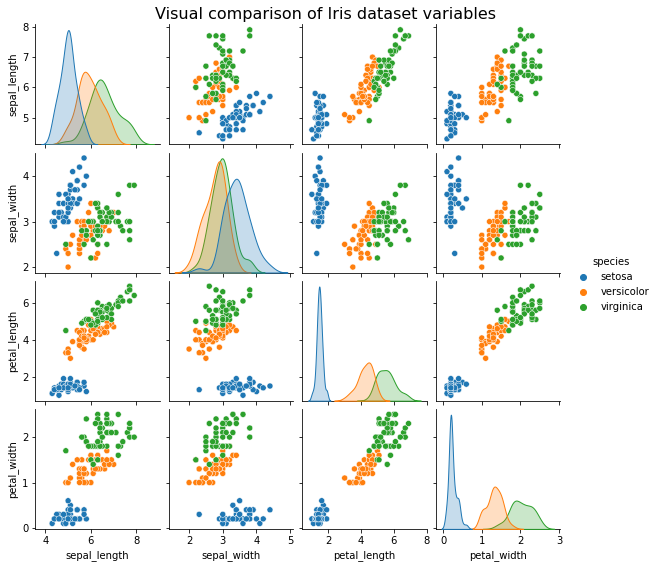

In [54]:
# Plot data comparisons of data. Code adpated from
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
plot = sns.pairplot(iris, height=2, hue='species')
# Add Title adapted from https://stackoverflow.com/a/52096280
plt.subplots_adjust(top=0.95)
plt.suptitle("Visual comparison of Iris dataset variables", fontsize = 16)
plt.show()

In [9]:
#present number of observations (150), number of features (4)

print(data.data.shape)

(150, 4)


In [7]:
#example used on https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

print(neigh.predict([[1.1]]))

print(neigh.predict_proba([[0.9]]))

[0]
[[0.66666667 0.33333333]]


In [55]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.5, random_state=2)

n_features = X.shape[1]
n_classes = Y.shape[1]


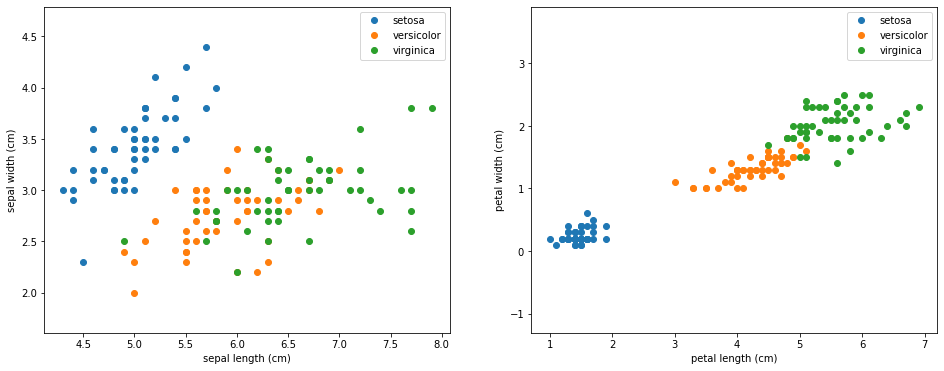

In [44]:
# Visualize the data sets
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.axis('equal')
plt.legend();

plt.subplot(1, 2, 2)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.axis('equal')
plt.legend();


In [41]:
# k-nearest-neighbour classifier on iris dataset
#  An explanation and code for the iris species based on the dataset using scikit-learn.
x = iris.data #data is like pandas dataframe, input variables
y = iris.target #target is like pandas Series, output variables

#define a function that prints the iris' classification based on the algorithm's output
def classifyiris(p):
    if p[0] == 0:
        print("The iris is setosa.\n")
    elif p[0] == 1:
        print("The iris is versicolor.\n")
    else:
        print("The iris is virginica.\n")

#Using the K Nearest Neighbor Algorithm
# Declare an of the KNN classifier class with the value with neighbors.
knn = KNeighborsClassifier(n_neighbors = 2)
#Fit the k-nearest neighbors classifier from the training dataset.
knn.fit(x,y)
#Predict the class labels for the data provided 
p = knn.predict([[3,5,4,2]])
print("Using the k nearest neighbor algorithm =", knn.predict([[3,5,4,2]]))
classifyiris(p)


Using the k nearest neighbor algorithm = [1]
The iris is versicolor.



In [62]:
#Prediction whether the given flower belongs to which species of Iris flower.

from  sklearn import  datasets
iris=datasets.load_iris()
x=iris.data
y=iris.target
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.5)
from sklearn import tree
classifier=tree.DecisionTreeClassifier()
classifier.fit(x_train,y_train)
predictions=classifier.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

0.9466666666666667


In [46]:
#Classifying the Iris Data Set with Keras
def create_custom_model(input_dim, output_dim, nodes, n=1, name='model'):
    def create_model():
        # Create model
        model = Sequential(name=name)
        for i in range(n):
            model.add(Dense(nodes, input_dim=input_dim, activation='relu'))
        model.add(Dense(output_dim, activation='softmax'))

        # Compile model
        model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
        return model
    return create_model

models = [create_custom_model(n_features, n_classes, 8, i, 'model_{}'.format(i)) 
          for i in range(1, 4)]

for create_model in models:
    create_model().summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 27        
Total params: 139
Trainable params: 139
Non-tr

In [47]:
from keras.callbacks import TensorBoard

history_dict = {}

# TensorBoard Callback
cb = TensorBoard()

for create_model in models:
    model = create_model()
    print('Model name:', model.name)
    history_callback = model.fit(X_train, Y_train,
                                 batch_size=5,
                                 epochs=50,
                                 verbose=0,
                                 validation_data=(X_test, Y_test),
                                 callbacks=[cb])
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    history_dict[model.name] = [history_callback, model]


Model name: model_1
Test loss: 0.29828834533691406
Test accuracy: 0.8799999952316284
Model name: model_2
Test loss: 0.2594127953052521
Test accuracy: 0.9200000166893005
Model name: model_3
Test loss: 0.24576406180858612
Test accuracy: 0.9200000166893005


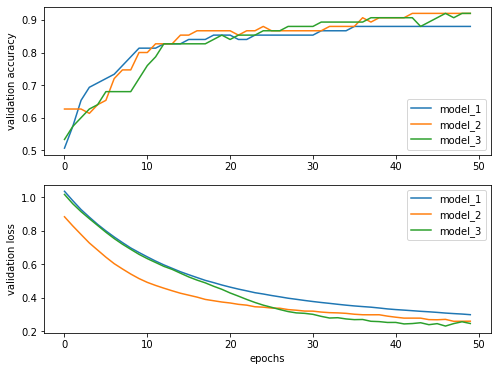

In [48]:
##Plot Accuracy and Loss from Training
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for model_name in history_dict:
    val_accurady = history_dict[model_name][0].history['val_accuracy']
    val_loss = history_dict[model_name][0].history['val_loss']
    ax1.plot(val_accurady, label=model_name)
    ax2.plot(val_loss, label=model_name)
    
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend();


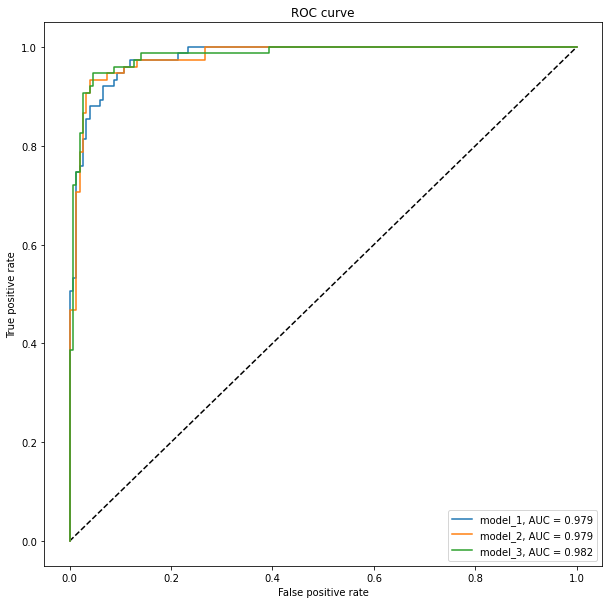

In [49]:
#Show ROC Curve

from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

for model_name in history_dict:
    model = history_dict[model_name][1]
    
    Y_pred = model.predict(X_test)
    fpr, tpr, threshold = roc_curve(Y_test.ravel(), Y_pred.ravel())
    
    plt.plot(fpr, tpr, label='{}, AUC = {:.3f}'.format(model_name, auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();


In [50]:
## Measure performance with cross validation

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

create_model = create_custom_model(n_features, n_classes, 8, 3)

estimator = KerasClassifier(build_fn=create_model, epochs=100, batch_size=5, verbose=0)
scores = cross_val_score(estimator, X_scaled, Y, cv=10)
print("Accuracy : {:0.2f} (+/- {:0.2f})".format(scores.mean(), scores.std()))


Accuracy : 0.93 (+/- 0.08)


In [21]:
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.5, random_state=2)

n_features = X.shape[1]
n_classes = Y.shape[1]


In [22]:
history_dict = {}

# TensorBoard Callback
cb = TensorBoard()

for create_model in models:
    model = create_model()
    print('Model name:', model.name)
    history_callback = model.fit(X_train, Y_train,
                                 batch_size=5,
                                 epochs=50,
                                 verbose=0,
                                 validation_data=(X_test, Y_test),
                                 callbacks=[cb])
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    history_dict[model.name] = [history_callback, model]


Model name: model_1
Test loss: 0.31701013445854187
Test accuracy: 0.8799999952316284
Model name: model_2
Test loss: 0.2020597904920578
Test accuracy: 0.9333333373069763
Model name: model_3
Test loss: 0.5639191269874573
Test accuracy: 0.6666666865348816
